# O objetivo deste projeto é buscar por padrões nos sorteios da Mega Sena.
## Atividades realizadas:
#### 1 - Plot dos numeros mais sorteados
     a - entre 1996-2020
     b - entre 2015-2020
     c - 2010-2015
     d - 2005-2010
     e - 2000-2005
     f - 1996-2000
#### 2 - Análise das sequencias que mais surgiram em 2015-2020 a partir dos numeros mais sorteados deste intervalo

#### 3 - Cálculo de chance para cada tipo de acerto

In [198]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import itertools
#import nbconvert

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [143]:
file_name = 'megasena.xlsx' 
df = pd.read_excel(file_name, index_col=0)  # Abrindo o arquivo excel com o pandas.
df = df.reset_index()  # Resetando o indice das linhas.
df.head(10)  # Plotando as 10 primeiras linhas do dataframe.

,As Loterias - www.asloterias.com.br - Todos Resultados da Mega Sena,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Este arquivo foi baixado no site www.asloteria...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Visite o site para baixar a versão mais atuali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TODOS RESULTADOS DA MEGA SENA POR ORDEM DE SOR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
6,2266,30/05/2020,23,37,59,10,58,31
7,2265,27/05/2020,50,20,46,23,14,39
8,2264,23/05/2020,29,19,8,2,37,3
9,2263,20/05/2020,43,49,57,33,9,24


In [141]:
df2 = df.drop(['As Loterias - www.asloterias.com.br - Todos Resultados da Mega Sena'], axis=1)  # Descartando a primeira coluna.
df2.columns = ['data', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6']  # Renomeando as colunas restantes.
df2 = df2.dropna()  # Descartando linhas com algum elemento nulo.
df2 = df2.drop(5)  # Descartando a linha 5.
df2 = df2.set_index('data')   # Setando as datas como indice das colunas.
df2.head()  # Chamando o novo dataframe.

,n1,n2,n3,n4,n5,n6
data,,,,,,
30/05/2020,23,37,59,10,58,31
27/05/2020,50,20,46,23,14,39
23/05/2020,29,19,8,2,37,3
20/05/2020,43,49,57,33,9,24
16/05/2020,7,30,46,23,8,14


### 1) Plot dos numeros mais sorteados

In [4]:
def numconv(df):  # Definindo função que transforma todos os elementos do dataframe em uma única lista.
    lista = df.values.tolist()  # Convertendo o datrafame em uma lista de listas com 4 elementos.
    lista = list(itertools.chain(*lista))  # Mesclando as listas internas e retornando somente uma lista grande.
    df = DataFrame (lista, columns=['numbers'])  # Definindo a lista como um dataframe de coluna chamada 'numbers'.
    df = df['numbers'].value_counts()  # Fazendo um novo dataframe com a contagem de repetição dos numeros do dataframe anterior.
    return df

In [5]:
def filtro(df,a,b,c,d,e):  # Definindo uma função que filtra o período escolhido a partir dos anos contidos na coluna 'data'.
    searchfor = [str(a), str(b), str(c), str(d), str(e)]  # criando uma variável de variáveis, com as entradas do comando convertidas em strings
    df = df.reset_index()  # Convertendo a 'data' de índice pra uma coluna normal.
    df = df[df.data.str.contains('|'.join(searchfor))]  # Buscando as linhas onde a data contém alguma das variáveis de entrada informadas e definindo um novo dataframe.
    df = df.set_index('data')  # Retornando a coluna data como um indice das linhas.
    return df

## a)

In [6]:
dftotal = numconv(df2)  # Aplicando a equação de contagem de números.
dftotal.head()  # A primeira coluna indica o número e a segunda indica quantas vezes este foi sorteado (por conta do metodo head, estamos exibindo somente as 5 primeiras linas).

53    258
10    258
23    251
5     251
4     246
Name: numbers, dtype: int64

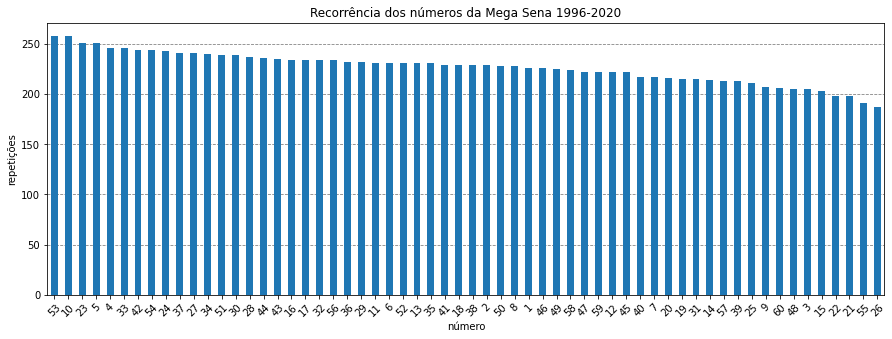

In [7]:
# Plotando todos os numeros com suas repetições podemos ver melhor as relações de recorrência.

plt.figure(figsize=(15,5))  # Determinando o tamanho do gráfico.
ax = plt.gca()  # Especificando os eixos que serão plotados                                              
plt.title('Recorrência dos números da Mega Sena 1996-2020')  # Definindo o título do gráfico.            

dftotal.plot(kind='bar',x= 'number', ax=ax)  # Plotagem das barras referentes aos números.

plt.ylabel('repetições')  # Nomeando o eixo Y.                                              
plt.xlabel('número')  # Nomeando o eixo X.                                             
plt.xticks(rotation=45)  # Rotacionando os nomes dos números abaixo das barras em 45º.                                           
ax.set_axisbelow(True)  # Em conjunto com o comando abaixo, projeta linhas tracejadas sobre o gráfico.
ax.yaxis.grid(color='gray', linestyle='dashed') 

In [147]:
# É interessante saber também a quantidade de sorteios que ocorreram.
len(df2)

2266

## b)

In [150]:
df2020 = filtro(df2, 2020, 2019, 2018, 2017, 2016)
df2020g = numconv(df2020)
df2020g.head()

10    67
11    66
34    61
37    61
35    60
Name: numbers, dtype: int64

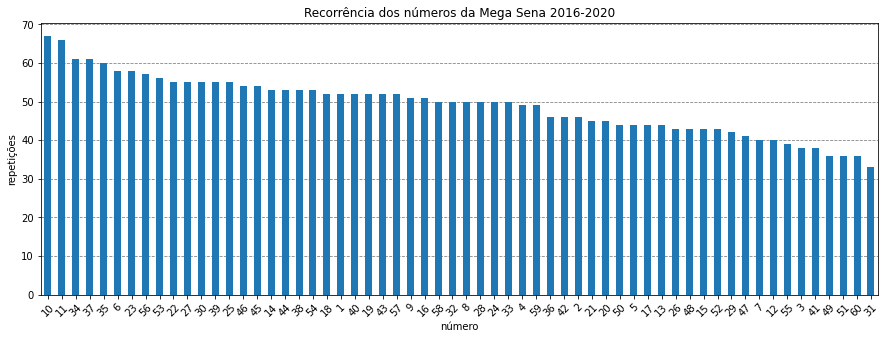

In [167]:
# Plotando todos os numeros com suas repetições podemos ver melhor as relações de recorrência.

plt.figure(figsize=(15,5))  # Determinando o tamanho do gráfico.
ax = plt.gca()  # Especificando os eixos que serão plotados                                              
plt.title('Recorrência dos números da Mega Sena 2016-2020')   # Definindo o título do gráfico.            

df2020g.plot(kind='bar',x= 'number', ax=ax)  # Plotagem das barras referentes aos números.

plt.ylabel('repetições')  # Nomeando o eixo Y.                                              
plt.xlabel('número')  # Nomeando o eixo X.                                             
plt.xticks(rotation=45)  # Rotacionando os nomes dos números abaixo das barras em 45º.                                           
ax.set_axisbelow(True)  # Em conjunto com o comando abaixo, projeta linhas tracejadas sobre o gráfico.
ax.yaxis.grid(color='gray', linestyle='dashed') 


In [152]:
len(df2020)

491

## c)

In [153]:
df2015 = filtro(df2, 2015, 2014, 2013, 2012, 2011)
df2015g = numconv(df2015)

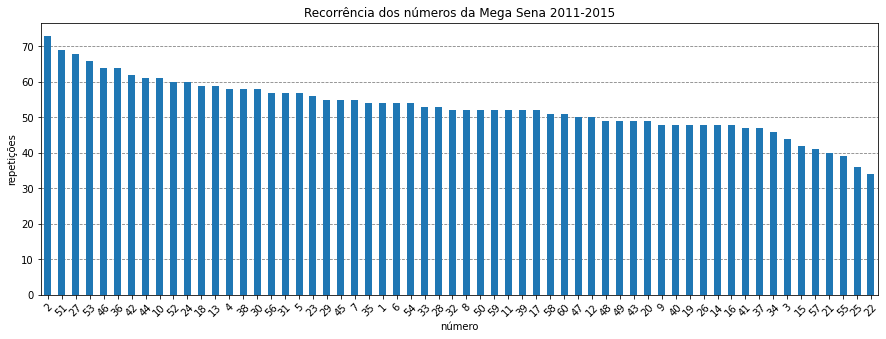

In [168]:
# Plotando todos os numeros com suas repetições podemos ver melhor as relações de recorrência.

plt.figure(figsize=(15,5))  # Determinando o tamanho do gráfico.
ax = plt.gca()  # Especificando os eixos que serão plotados                                              
plt.title('Recorrência dos números da Mega Sena 2011-2015')   # Definindo o título do gráfico.            

df2015g.plot(kind='bar',x= 'number', ax=ax)  # Plotagem das barras referentes aos números.

plt.ylabel('repetições')  # Nomeando o eixo Y.                                              
plt.xlabel('número')  # Nomeando o eixo X.                                             
plt.xticks(rotation=45)  # Rotacionando os nomes dos números abaixo das barras em 45º.                                           
ax.set_axisbelow(True)  # Em conjunto com o comando abaixo, projeta linhas tracejadas sobre o gráfico.
ax.yaxis.grid(color='gray', linestyle='dashed')

In [156]:
len(df2015)

530

## d)

In [157]:
df2010 = filtro(df2, 2010, 2009, 2008, 2007, 2006)
df2010g = numconv(df2010)

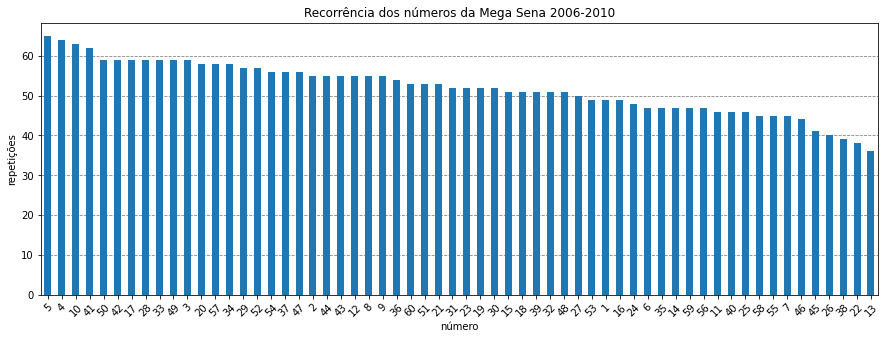

In [169]:
# Plotando todos os numeros com suas repetições podemos ver melhor as relações de recorrência.

plt.figure(figsize=(15,5))  # Determinando o tamanho do gráfico.
ax = plt.gca()  # Especificando os eixos que serão plotados                                              
plt.title('Recorrência dos números da Mega Sena 2006-2010')   # Definindo o título do gráfico.            

df2010g.plot(kind='bar',x= 'number', ax=ax)  # Plotagem das barras referentes aos números.

plt.ylabel('repetições')  # Nomeando o eixo Y.                                              
plt.xlabel('número')  # Nomeando o eixo X.                                             
plt.xticks(rotation=45)  # Rotacionando os nomes dos números abaixo das barras em 45º.                                           
ax.set_axisbelow(True)  # Em conjunto com o comando abaixo, projeta linhas tracejadas sobre o gráfico.
ax.yaxis.grid(color='gray', linestyle='dashed')

In [159]:
len(df2010)

520

## e)

In [164]:
df2005 = filtro(df2, 2005, 2004, 2003, 2002, 2001)
df2005g = numconv(df2005)

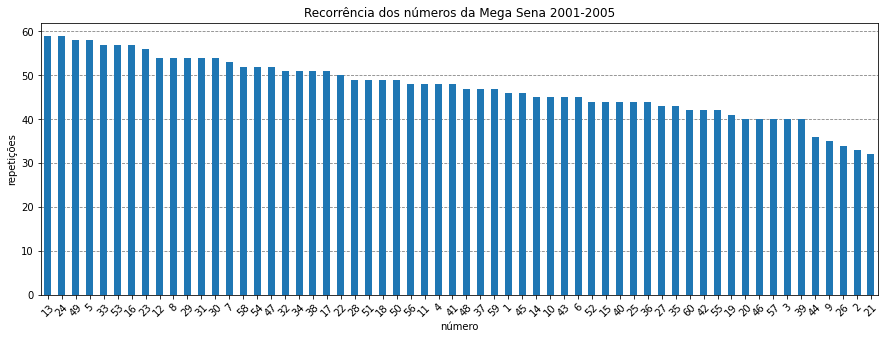

In [165]:
# Plotando todos os numeros com suas repetições podemos ver melhor as relações de recorrência.

plt.figure(figsize=(15,5))  # Determinando o tamanho do gráfico.
ax = plt.gca()  # Especificando os eixos que serão plotados                                              
plt.title('Recorrência dos números da Mega Sena 2001-2005')   # Definindo o título do gráfico.            

df2005g.plot(kind='bar',x= 'number', ax=ax)  # Plotagem das barras referentes aos números.

plt.ylabel('repetições')  # Nomeando o eixo Y.                                              
plt.xlabel('número')  # Nomeando o eixo X.                                             
plt.xticks(rotation=45)  # Rotacionando os nomes dos números abaixo das barras em 45º.                                           
ax.set_axisbelow(True)  # Em conjunto com o comando abaixo, projeta linhas tracejadas sobre o gráfico.
ax.yaxis.grid(color='gray', linestyle='dashed')

In [161]:
len(df2005)

60

## f)

In [171]:
df2000 = filtro(df2, 2000, 1999, 1998, 1997, 1996)
df2000g = numconv(df2000)

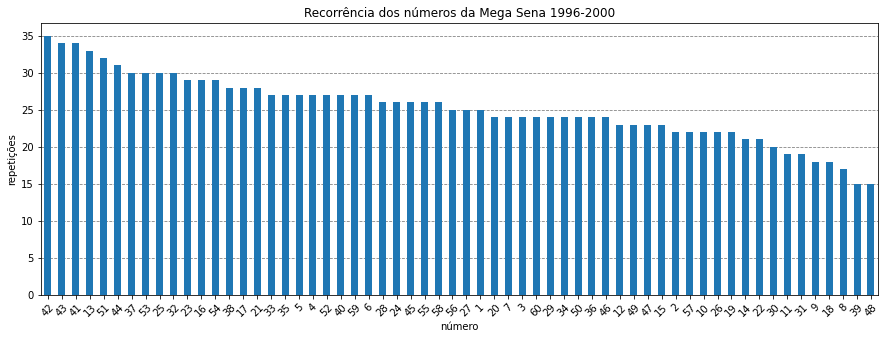

In [172]:
# Plotando todos os numeros com suas repetições podemos ver melhor as relações de recorrência.

plt.figure(figsize=(15,5))  # Determinando o tamanho do gráfico.
ax = plt.gca()  # Especificando os eixos que serão plotados                                              
plt.title('Recorrência dos números da Mega Sena 1996-2000')   # Definindo o título do gráfico.            

df2000g.plot(kind='bar',x= 'number', ax=ax)  # Plotagem das barras referentes aos números.

plt.ylabel('repetições')  # Nomeando o eixo Y.                                              
plt.xlabel('número')  # Nomeando o eixo X.                                             
plt.xticks(rotation=45)  # Rotacionando os nomes dos números abaixo das barras em 45º.                                           
ax.set_axisbelow(True)  # Em conjunto com o comando abaixo, projeta linhas tracejadas sobre o gráfico.
ax.yaxis.grid(color='gray', linestyle='dashed')

In [173]:
len(df2000)

252

#### 2 - Análise das sequencias que mais surgiram em 2015-2020 a partir dos numeros mais sorteados deste intervalo.

In [182]:
df2020b = filtro(df2, 2020, 2019, 2018, 2017, 2016)
df2020c = df2020b.values.tolist()

In [186]:
def contador(listas):  # Definindo a função que vai contar quantos valores do sorteio batem com os 6 valores mais sorteados do período 2015-2020.
    dic = [10, 37, 11, 35, 34, 6]  # Criando uma lista com os 6 valores mais recorrentes.
    count = 0  # Criando um contador
    contagem = []  # Criando uma lista com as contagens.
    for i in listas:  # Para cada row do dataframe:
        for h in i:   # Para cada elemento da row:
            if h in dic:  # Se o elemento estiver dentro da lista 'dic', onde inserimos os números que mais são sorteados:
                count += 1  # Aumenta uma unidade no contador temporário.
        contagem.append(count)  # Ao termino do loop for que confere cada elemento, adiciona à lista 'contagem', o valor acumulado no 'counts'.
        count = 0  # Reseta a variável 'counts' para começar a contagem dos elementos da próxima row partindo de zero.
    return contagem

def sequencia(listas):  # Definindo a função que vai inserir uma nova coluna no dataframe com os elementos que coincidem com os 6 mais recorrentes do período 2015-2020.
    dic = [10, 37, 11, 35, 34, 6]  # Criando uma lista com os 6 valores mais recorrentes.
    seq = []  # Criando uma lista que vai formar a coluna do dataframe.
    seq2 = []  # Criando uma segunda lista que vai conter cada número coincidente com cada valor.
    for i in listas:  # Para cada row do dataframe:
        for h in i:  # Para cada elemento da row:
            if h in dic:  # Se o elemento estiver dentro da lista 'dic', onde inserimos os números que mais são sorteados: 
                seq2.append(h)  # Adicionar o elemento na lista 'seq2' temporária.
        seq.append(seq2)  # Adiciona a lista 'seq2' na lista 'seq'.
        seq2 = []  # Reseta a lista 'seq2' para uma nova analise da próxima row.
    return seq

ctd = contador(df2020c)  # Aplicando a função de contagem.
dfcount = DataFrame (ctd,columns=['contador'])  # Criando um novo dataframe que cita quantos elementos coincidiram.

sqc = sequencia(df2020c)  # Aplicando a função de sequencias.      
dfseq = DataFrame (sqc, columns=['numero1', 'numero2', 'numero3', 'numero4'])  # Criando um novo dataframe que cita os valores coincidentes em 4 colunas (pois 4 aqui foi o maior numero de acertos).


dflists = DataFrame (df2020c, columns=['n1', 'n2', 'n3', 'n4', 'n5', 'n6', ])  # Retornando a lista com os sorteios como um dataframe.

result = pd.concat([dflists, dfcount, dfseq], axis=1)  # Adicionando ao dataframe de sorteios o dataframe de contagem e o dataframe de sequencias. 
results = result.sort_values(by ='contador', ascending=False )  # Ordenando as linhas po quantidade de acertos.
results.head(10)  # Exibindo as 10 primeiras linhas.

,n1,n2,n3,n4,n5,n6,contador,numero1,numero2,numero3,numero4
266,6,37,34,10,3,17,4,6.0,37.0,34.0,10.0
276,37,26,11,24,59,34,3,37.0,11.0,34.0,NaN
166,1,35,13,11,10,49,3,35.0,11.0,10.0,NaN
384,41,35,37,10,19,9,3,35.0,37.0,10.0,NaN
59,43,11,6,55,53,10,3,11.0,6.0,10.0,NaN
175,12,11,10,59,38,37,3,11.0,10.0,37.0,NaN
22,11,5,42,3,34,37,3,11.0,34.0,37.0,NaN
6,37,12,14,34,35,47,3,37.0,34.0,35.0,NaN
125,10,19,11,37,41,17,3,10.0,11.0,37.0,NaN
239,11,15,39,37,29,44,2,11.0,37.0,NaN,NaN


A sequencia 6, 37, 34, 10 foi a que mais se repetiu entre os 6 digitos, com somente uma repetição.

#### 3 - Cálculo de chance para cada tipo de acerto

##### Combinações possíveis com 6 dígitos da Mega Sena:
(60!)/(6!(60-6)!) = 50.063.860

##### Chance de acertar todos os 6 dígitos:
1/50063860 ou 0,000002%

##### Combinações possíveis com 5 digitos:
(60!)/(5!(60-5)!) = 5.461.512

##### Chance de acertar todos os 5 dígitos:
1/5461512 ou 0.00002%

##### Combinações possíveis com 4 digitos:
(60!)/(4!(60-4)!) = 487.635


##### Chance de acertar todos os 4 dígitos:
1/487635 ou 0.0002%

### Conclusão até aqui: 
    Podemos ver que, por mais que alguns números acabem se repetindo algumas vezes a mais, existem tantas combinações que, a chance de acertar uma sequência de 4 ou mais digitos tornasse, em sua maior parte, pura sorte.